![img](http://drive.google.com/uc?export=view&id=1Gi4lNIANsWjxlvikM4h1Xein_PPwhHgM)
# **Introduction to K-means**

## **Part 1**: Concept introduction
#### Import libraries and download dataset

We are continuing to use Scikit-Learn as our primary ML library.
The specific documentation for [k-means can be found here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

![img](http://drive.google.com/uc?export=view&id=12uOIWDlAk5YRgy9FOALfUlK0fVt5JTvH)

In [1]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

#### Data for later in the exercise

In [2]:
url = 'https://raw.githubusercontent.com/mubaris/friendly-fortnight/master/xclara.csv'
test = pd.read_csv(url)

## Clustering!   Finding **GROUPS**

How many groups do you see?

![img](http://drive.google.com/uc?export=view&id=1am-0t4grAQueYP9IMmgV0dC4MHWTKd6h)


## Intuitive K means approach

### Observe the following four methods with a sample dataset:

#### Method 1

[Method 1](http://drive.google.com/uc?export=view&id=1rQsgwmbeKsf9lgAv4onHJQMNqYcXZ1cr)

#### Method 2

[Method 2](http://drive.google.com/uc?export=view&id=1duSB73v8ugD5liZyn5dUeSOgwvAbdgui)

#### Method 3

[Method 3](http://drive.google.com/uc?export=view&id=1ZRa7oAskuwSQxLqEyYQc8FZWjERnQx_e)

#### Method 4

[Method 4](http://drive.google.com/uc?export=view&id=1TE62xmACOaux75AlzivcP7tSzR86n8ZE)

### Method Questions:

- What do they have in common?
    - each starts with 4 points (we choose the # of clusters based on a hypothesis)
    - associate data points with the closest "cluster centroid" based on distance
    - once every point is connected to a centroid, the centroid resets to the center of it's points, then the points reassign based on NEW closest "cluster centroid"
- What are the differences between them?
    - start centroids at different points
- How many groups are there in the end?
- Do you see any problems with this method?

###### Notes:
- we could start each centroid closest to top/bottom/right/left
- we could start each centroid at a random location, or towards the center
- we could evaluate the clustering process using sum of squared error or we could hope to minimize something else
- we could use cosine distance > euclidean distance with multidimensionality
- we can SCALE/WEIGHT FEATURES based on the importance to the clustering process

### Review Data

We will now use the dataset we uploaded earlier:

`url = 'https://raw.githubusercontent.com/mubaris/friendly-fortnight/master/xclara.csv'`

`test = pd.read_csv(url)`

- This is a sample dataset. 
- Let us assume the data is already scaled.

#### EDA of variables

In [3]:
test.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [4]:
test.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


#### Introduction of `Kmeans`

In [12]:
model = KMeans(n_clusters=4).fit(test)

In [13]:
model.cluster_centers_

array([[ 69.92418447, -10.11964119],
       [ 31.63582737,  60.24165706],
       [  9.45577774,  10.66209744],
       [ 47.97822008,  59.24771428]])

In [19]:
jenny = [50,45]
zardulu = [110,-241]
melissa = [10,10]
gertrude = [30,60]

In [20]:
data = [jenny, zardulu, melissa, gertrude]

In [22]:
model.predict(data) #tells us what cluster it thinks these new data points belong to based on the fitted model

array([3, 0, 2, 1], dtype=int32)

In [23]:
#WE WANT TO PRESERVE/LOCK IN THE MODEL THAT WE FIT ONCE WE'RE COOL WITH THE CLUSTERS
import pickle

In [26]:
#SAVE TO PICKLE
with open('clustering_model.pkl','wb') as f:
    pickle.dump(model, f)

In [32]:
!ls

K-Means.ipynb        README.md            clustering_model.pkl


In [31]:
#BRING PICKLE BACK
with open('clustering_model.pkl','rb') as f:
    resurrected_model = pickle.load(f)
    
resurrected_model.predict(data)

array([3, 0, 2, 1], dtype=int32)

## Note! 
#### Do you have different cluster_centers?
*Good!*

We saw in the demo that the algorithm is sensitive to starting points.

We can use the additional argument `random_state` to set the seed and have a repeatable results

In [34]:
#RANDOM STATE IS KINDA THE WRONG WAY TO SAVE YOUR CLUSTER RESULTS

#BEST WAY: PICKLE CLUSTERS
#BACKUP WAY: SAVE CLUSTER COORDINATES

model_setseed = KMeans(n_clusters=4, random_state=10).fit(test)
model_setseed.cluster_centers_

array([[ 48.09974943,  59.34612869],
       [ 69.92418447, -10.11964119],
       [  9.45577774,  10.66209744],
       [ 31.77135822,  60.10656849]])

#### **Exercise**: 
- Try running `Kmeans` with different number of `n_clusters`, k=2 through k=7
- Check the `cluster_centers_` 
- Without running any more functions, which number of K is the best?

In [48]:
#Practice code goes here
model5 = KMeans(n_clusters=10, random_state=10).fit(test)
model5.cluster_centers_

sorted(model5.cluster_centers_.tolist())
#OBVIOUSLY, some are really close together and it might make sense to combine clusters

[[0.0521469201655691, 5.341040788079461],
 [9.378356929292917, 20.832665993265994],
 [18.895785189189187, 5.700353393006768],
 [30.43606224199288, 65.83603473309606],
 [34.43332498207886, 50.56345100358422],
 [47.02025532951289, 67.45515782234956],
 [50.41999422131148, 51.572713606557386],
 [62.05342594684385, -18.048111986710968],
 [67.09414265306121, -0.2728089213760896],
 [80.7676996103896, -13.337153405844152]]

### possible use to engineer new features:
- Clustering can be used to label data in a new way so long as you look into/understand what the data points in each cluster actually have in common
- what is the pattern actually saying about each cluster?

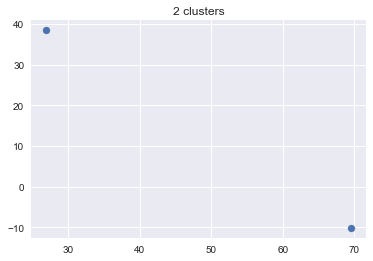

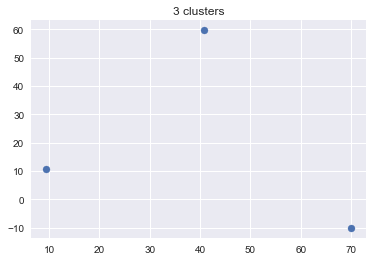

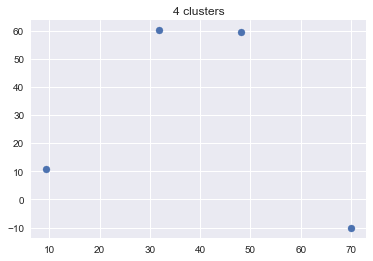

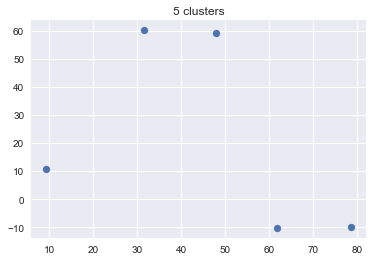

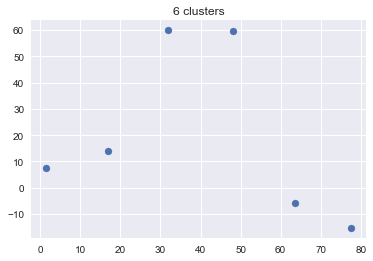

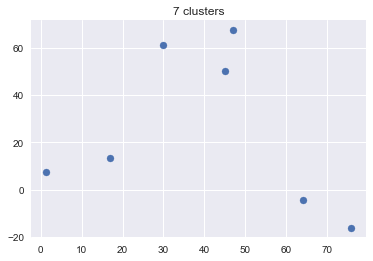

In [53]:
for n in range(2, 8):
    model6 = KMeans(n_clusters=n, random_state=10).fit(test)
    #print(n, model5.cluster_centers_)
    plt.figure()
    plt.title(f'{n} clusters')
    x = [i[0] for i in model6.cluster_centers_]
    y = [i[1] for i in model6.cluster_centers_]
    plt.scatter(x, y)

## **Part 2**: Choosing the appropriate number of K

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### **Part 2A**: Elbow Method

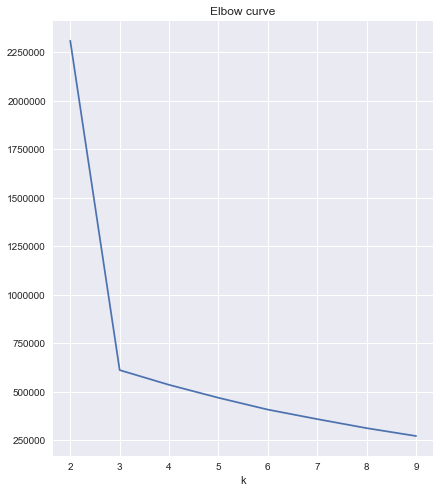

In [49]:
# Specifying the dataset and initializing variables
X = test
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)


- Diminishing returns on additional K's after k=3

### **Part 2B**: Silhouette coefficient

In [50]:
# Generate silhouette coefficient for each k
X = test
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

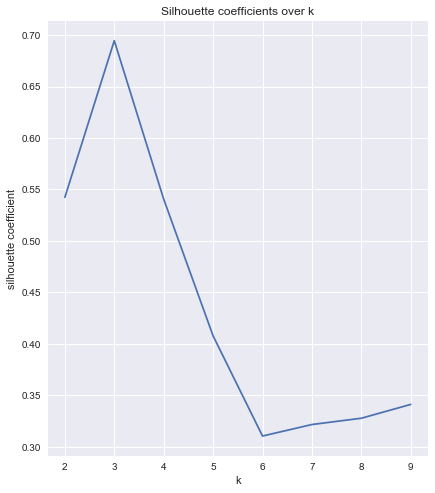

In [52]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.grid(True)

- Silouette Score: goes down as you add too much to K, highest coefficient yields the optimal K
    - silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)

## **Part 3**: **Assumptions** and **challenges** of K-means

- Demonstrate the ideal K-means dataset
- Show three scenarios where K-means struggles

In [54]:
# Create example datasets

# Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, _ = datasets.make_blobs(n_samples=5000,
                                centers=centers_neat,
                                cluster_std=2,
                                random_state=2)

x_messy, labs3 = datasets.make_classification(n_samples=5000,
                                         n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          shuffle=False,
                                          random_state=301)

In [55]:
# Predict K-Means cluster membership
km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)
km_messy2 = KMeans(n_clusters=3, random_state=2).fit(x_messy)

#### Ideal K-means scenario

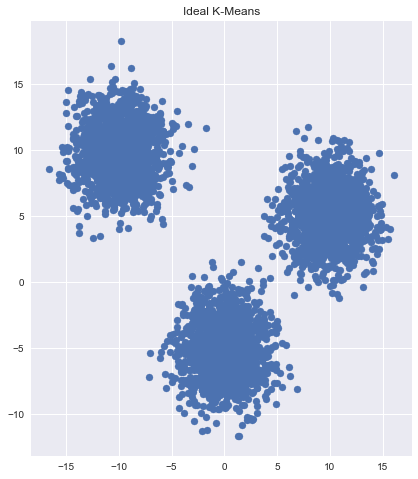

In [56]:
# Ideal K-means scenario
plt.figure(figsize=(15,8))
plt.subplot(121, title='Ideal K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1])

#### Problem Scenario 1

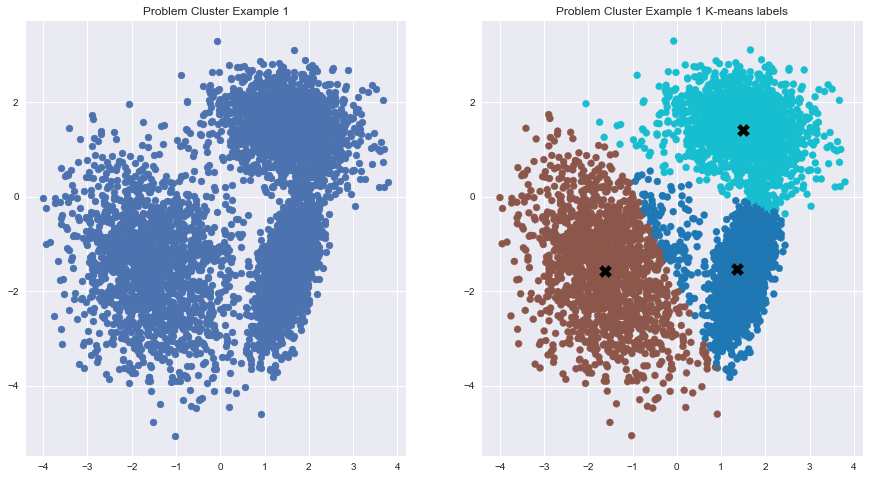

In [59]:
# Problem Scenario 1

plt.figure(figsize=(15,8))
plt.subplot(121, title='Problem Cluster Example 1')
plt.scatter(x_messy[:,0], x_messy[:,1])
plt.subplot(122, title='Problem Cluster Example 1 K-means labels')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)
plt.scatter(km_messy2.cluster_centers_[:,0], km_messy2.cluster_centers_[:,1], marker='X', s=150, c='black')

- K-means is measuring distances, and is the baseline clustering model
    - so K-means doesn't really pick up on the fact that some of those dark blue values should probably be a part of the brown cluster instead

#### Problem Scenario 2

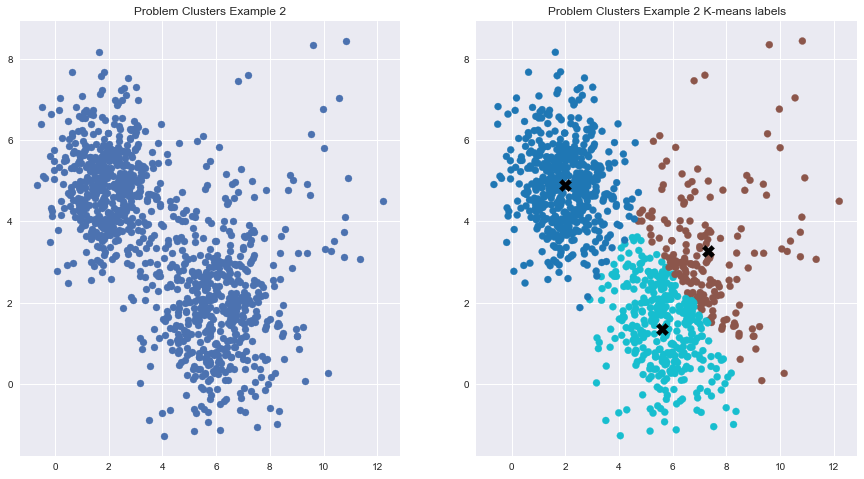

In [60]:
# Problem Scenario 2


# Second toy data set
blob1, y1 = datasets.make_blobs(n_samples=25,
                               centers=[(10,5)],
                               cluster_std=1.5,
                               random_state=2)

blob2, y2 = datasets.make_blobs(n_samples=500,
                               centers=[(6,2)],
                               cluster_std=1.3,
                               random_state=2)

blob3, y3 = datasets.make_blobs(n_samples=500,
                               centers=[(2,5)],
                               cluster_std=1,
                               random_state=2)

unbal = np.vstack([blob1, blob2, blob3])
y1[y1 == 0] = 0
y2[y2 == 0] = 1
y3[y3 == 0] = 2
labs = np.concatenate([y1, y2, y3])

#Predict K-Means cluster membership
km_unbal = KMeans(n_clusters=3, random_state=2).fit(unbal)
km_unbal_preds = KMeans(n_clusters=3, random_state=2).fit_predict(unbal)

plt.figure(figsize=(15,8))
plt.subplot(121, title= 'Problem Clusters Example 2')
plt.scatter(unbal[:,0], unbal[:,1])
plt.subplot(122, title='Problem Clusters Example 2 K-means labels')
plt.scatter(unbal[:,0], unbal[:,1], c=km_unbal_preds, cmap=cmap)
plt.scatter(km_unbal.cluster_centers_[:,0], km_unbal.cluster_centers_[:,1], marker='X', s=150, c='black')

#### Problem Scenario 3

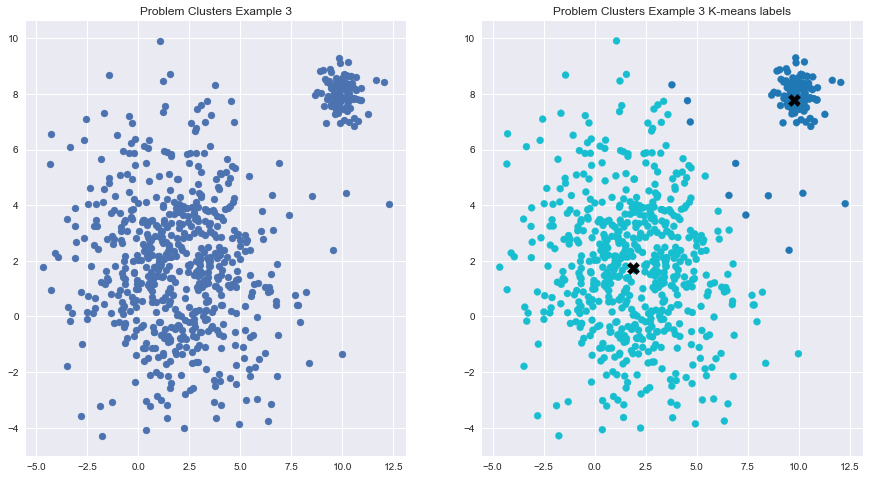

In [61]:
# Problem Scenario 3

# Third toy data set
blob1, y1 = datasets.make_blobs(n_samples=100,
                               centers=[(10,8)],
                               cluster_std=0.5,
                               random_state=2)

blob2, y2 = datasets.make_blobs(n_samples=600,
                               centers=[(2,2)],
                               cluster_std=2.5,
                               random_state=2)


unbal = np.vstack([blob1, blob2])
y1[y1 == 0] = 0
y2[y2 == 0] = 1
labs = np.concatenate([y1, y2])

#Predict K-Means cluster membership
km_unbal = KMeans(n_clusters=2, random_state=2).fit(unbal)
km_unbal_preds = KMeans(n_clusters=2, random_state=2).fit_predict(unbal)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Problem Clusters Example 3')
plt.scatter(unbal[:,0], unbal[:,1])
plt.subplot(122, title='Problem Clusters Example 3 K-means labels')
plt.scatter(unbal[:,0], unbal[:,1], c=km_unbal_preds, cmap=cmap)
plt.scatter(km_unbal.cluster_centers_[:,0], km_unbal.cluster_centers_[:,1], marker='X', s=150, c='black')

## Bonus:
### K-means on larger dataset

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`
the link for the dataset can be found here: https://raw.githubusercontent.com/aapeebles/kmeans_flatiron/master/Kmeans%20lesson/Wine.csv


Instructions:
- First, remove customer_segment from the dataset

In [ ]:
# Work on problem here:


